In [7]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [8]:
# ---------------------------- Importando os dados --------------------------- #
df1 = pd.read_csv('dadosConcentracao.csv', header=None)

df1

,0,1,2
0,0,150,0
1,1,118,16
2,2,114,18
3,3,104,23
4,4,102,24
...,...,...,...
14996,14996,2,74
14997,14997,2,74
14998,14998,2,74
14999,14999,2,74


In [9]:
# ------------------------- Igualando as porcentagens ------------------------ #
eixo_x = np.array(df1[0], dtype=np.float128) * 1e-5

eixo_y1 = np.array(df1[1], dtype=np.float128)
eixo_y2 = 2 * np.array(df1[2], dtype=np.float128)

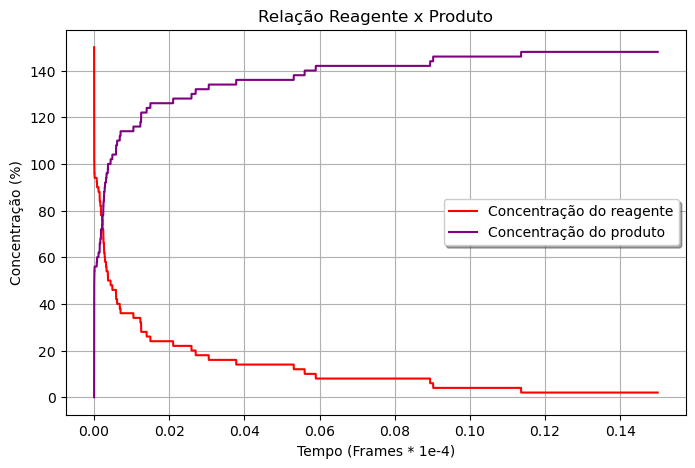

In [10]:
# ---------------------- Plotando os dados da simulação ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Concentração (%)')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red')
plt.plot(eixo_x, eixo_y2, label='Concentração do produto', color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [11]:
# --------- Encontrando os parâmetros da função descrita pelos dados --------- #
def supReag(x, a, b, c):
    return a * np.exp(-b * x) + c

def supProd(x, a, b, c):
    return a * (- np.exp(-b * x)) + c

params1, _ = optimize.curve_fit(supReag, eixo_x, eixo_y1)
params2, _ = optimize.curve_fit(supProd, eixo_x, eixo_y2)

print("Parâmetros do reagente:", params1, "\n\nParâmetros do produto:",  params2)

Parâmetros do reagente: [68.29934923 65.42529572  5.33155629] 

Parâmetros do produto: [ 68.30246585  65.43332454 144.6679079 ]


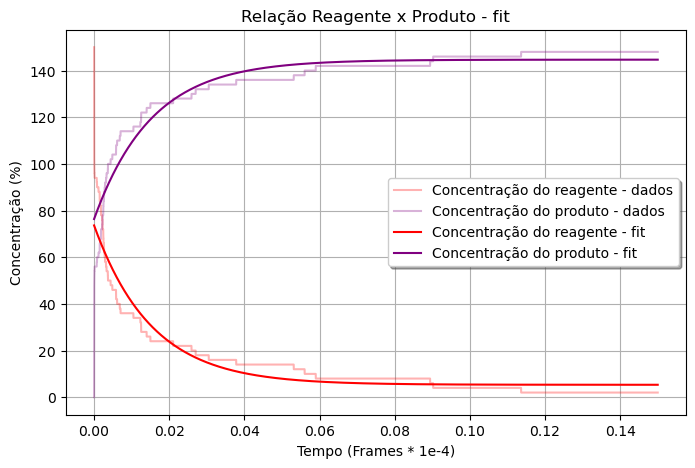

In [12]:
# --------------- Plotando interpolação dos dados da simulação --------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto - fit')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Concentração (%)')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente - dados', color='red', alpha=.3)
plt.plot(eixo_x, eixo_y2, label='Concentração do produto - dados', color='purple', alpha=.3)

plt.plot(eixo_x, supReag(eixo_x, *params1), label="Concentração do reagente - fit", color='red')
plt.plot(eixo_x, supProd(eixo_x, *params2), label="Concentração do produto - fit", color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 